# Proyecto de Analítica predictiva y modelos de regresión en Python

In [2]:
import pandas as pd

El dataset que será utilizado hace referencia a datos sobre moluscos. El objetivo de este notebook será constuir un modelo capaz de predecir la edad del molusco.

## Parte 1: Análisis exploratorio

### ¿Cuántos datos tenemos para nuestro análisis?

Importo los datos.

In [4]:
df = pd.read_csv('./data_sets/abalone_train.csv')

In [5]:
df.head()

,sexo,longitud,diametro,altura,peso_entero,peso_sin_cascara,peso_visceras,peso_cascara,edad
0,M,0.620,0.490,0.155,1.1000,0.5050,0.2475,0.3100,9
1,I,0.475,0.375,0.110,0.4560,0.1820,0.0990,0.1600,9
2,M,0.600,0.475,0.175,1.1100,0.5105,0.2560,0.2850,9
3,I,0.340,0.255,0.075,0.1800,0.0745,0.0400,0.0525,6
4,F,0.670,0.505,0.205,1.3645,0.6075,0.3025,0.3530,9


In [6]:
df.shape

(3342, 9)

Existen 3342 ejemplos que pueden ser utilizados para el entrenamiento del modelo. Cada ejemplo cuenta con 9 características del molusco, donde la última columna es la edad, la característica que se quiere predecir.

### Encontrar estadísticas descriptivas de todas las variables de la base de datos. 

Información general sobre los datos disponibles.

In [7]:
df.describe()

,longitud,diametro,altura,peso_entero,peso_sin_cascara,peso_visceras,peso_cascara,edad
count,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000
mean,0.522362,0.406858,0.139461,0.823557,0.355899,0.179492,0.238495,10.040694
std,0.120648,0.099741,0.042764,0.491525,0.221827,0.109655,0.141137,3.335768
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.345000,0.115000,0.438000,0.182000,0.092500,0.127875,8.000000
50%,0.540000,0.425000,0.140000,0.795750,0.332000,0.169250,0.230000,10.000000
75%,0.615000,0.480000,0.165000,1.145000,0.497000,0.249875,0.325000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Gráficos de dispersión

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Se compara cada variable contra la característica que se quiere predecir.

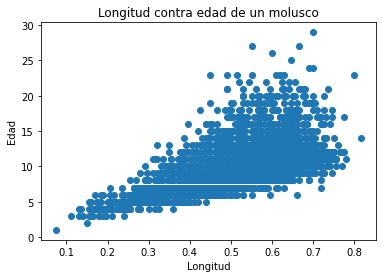

In [25]:
plt.scatter(df['longitud'],df['edad'])
plt.title('Longitud contra edad de un molusco')
plt.ylabel('Edad')
plt.xlabel('Longitud')
plt.show()

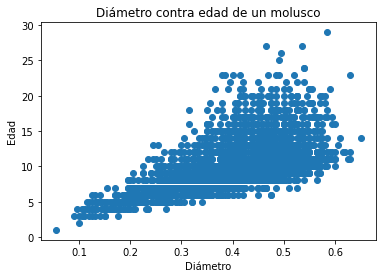

In [47]:
plt.scatter(df['diametro'],df['edad'])
plt.title('Diámetro contra edad de un molusco')
plt.ylabel('Edad')
plt.xlabel('Diámetro')
plt.show()

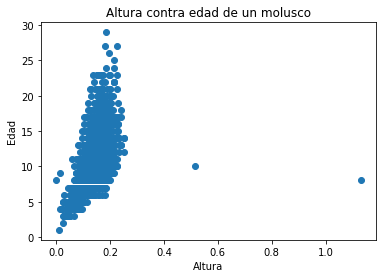

In [48]:
plt.scatter(df['altura'],df['edad'])
plt.title('Altura contra edad de un molusco')
plt.ylabel('Edad')
plt.xlabel('Altura')
plt.show()

Se puede observar que en la altura existen algunos datos extremos que podrían sesgar el entrenamiento.

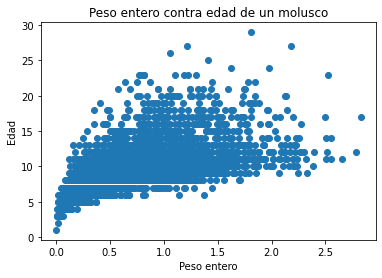

In [18]:
plt.scatter(df['peso_entero'],df['edad'])
caractersitica = 'Peso entero'
plt.title('{c} contra edad de un molusco'.format(c=caractersitica))
plt.ylabel('Edad')
plt.xlabel(caractersitica)
plt.show()

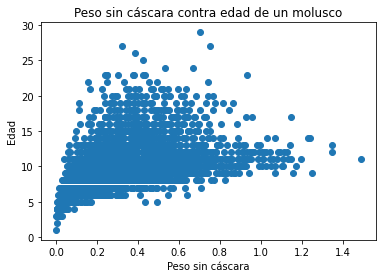

In [17]:
plt.scatter(df['peso_sin_cascara'],df['edad'])
caractersitica = 'Peso sin cáscara'
plt.title('{c} contra edad de un molusco'.format(c=caractersitica))
plt.ylabel('Edad')
plt.xlabel(caractersitica)
plt.show()

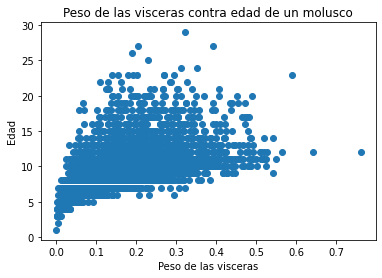

In [20]:
plt.scatter(df['peso_visceras'],df['edad'])
caractersitica = 'Peso de las visceras'
plt.title('{c} contra edad de un molusco'.format(c=caractersitica))
plt.ylabel('Edad')
plt.xlabel(caractersitica)
plt.show()

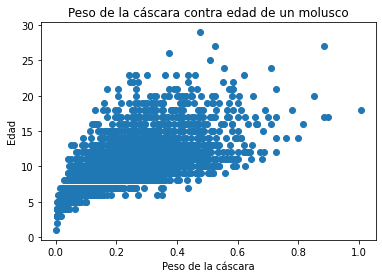

In [22]:
plt.scatter(df['peso_cascara'],df['edad'])
caractersitica = 'Peso de la cáscara'
plt.title('{c} contra edad de un molusco'.format(c=caractersitica))
plt.ylabel('Edad')
plt.xlabel(caractersitica)
plt.show()

Este análisis muestra unas pequeñas pistas de correlación entre las variables. Esto servirá para guiar la construcción del modelo.